In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
# architecture variables
PATH = "data/dog_breeds/"

arch=resnet50
sz=200
bs=64

In [4]:
# get cross validation indexes of labels
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [5]:
# model variables
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz=sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=bs, tfms=tfms, val_idxs=val_idxs,
                                       suffix='.jpg', test_name='test')
    return data

In [6]:
# dataset
data = get_data(sz, bs)

In [7]:
# Train last layer
learn = ConvLearner.pretrained(arch, data, ps=0.5)

# ps -> dropout parameters
# hyperparameter to control overfitting (train loss < val loss) by dropping random % of nodes in a layer

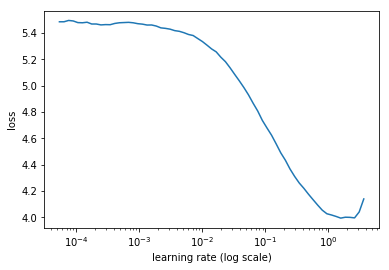

In [10]:
learn.lr_find()
learn.sched.plot_lr()
learn.sched.plot()

In [11]:
lr = 1e-1

In [12]:
learn.fit(lr, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[0.      2.24411 1.61871 0.56805]                         
[1.      1.79941 1.52463 0.57567]                         
[2.      1.64031 1.49737 0.58593]                         
[3.      1.54628 1.45372 0.59697]                         
[4.      1.45879 1.44888 0.59056]                         



In [13]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.save('224')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      2.05372 1.59341 0.56377]                         
[1.      1.77197 1.59973 0.55281]                         
[2.      1.19329 1.34195 0.6168 ]                         
[3.      1.37093 2.01166 0.49351]                         
[4.      1.11145 1.53619 0.58342]                         
[5.      0.72934 1.39836 0.6287 ]                          
[6.      0.50742 1.36139 0.64156]                          



In [14]:
learn.set_data(get_data(330, 30))
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.save('330')

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[0.      0.62243 0.7711  0.76952]                            
[1.      0.58496 0.76    0.77905]                            
[2.      0.54907 0.76137 0.77762]                            



In [ ]:
learn.set_data(get_data(400, 30))
learn.fit(lr, 3, cycle_len=1)

In [18]:
# Test Time Augmentation

log_preds,y = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds),0)
accuracy(probs,y)

0.006662160857391137

In [25]:
df = pd.DataFrame(probs)
df.columns = learn.data.classes
df.insert(0, 'id', [o[5:-4] for o in learn.data.test_ds.fnames])

In [26]:
df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,de084b830010b6107215fef5d4a75b94,1.823484e-11,1.394909e-07,4.103534e-10,4.380160e-08,2.605817e-10,1.020717e-09,3.530714e-10,1.573237e-10,9.892961e-11,...,8.912542e-12,1.201676e-12,1.217682e-10,5.759350e-10,6.381653e-09,1.827307e-11,2.796822e-08,1.218700e-07,1.704971e-09,5.188032e-11
1,6b423ca7020e70eb05732843c5d2bad1,2.349306e-08,3.421273e-09,7.740203e-10,1.185739e-07,1.228176e-09,7.702597e-10,2.227327e-09,4.853053e-08,4.085577e-11,...,1.656781e-09,4.142947e-10,8.243625e-10,2.093070e-10,1.378135e-09,3.981084e-11,7.650399e-08,2.463987e-08,6.134023e-07,4.934427e-11
2,74aa7e201e0e93e13e87b986a7d31839,3.804424e-06,3.866229e-07,1.808914e-08,9.408192e-03,3.692712e-06,1.289023e-07,1.152652e-05,3.846069e-05,9.806897e-08,...,1.703896e-04,9.547628e-07,1.643528e-07,1.493615e-06,1.633305e-08,3.010337e-07,1.615819e-06,1.441146e-05,3.145353e-01,6.077284e-07
3,a079f72193264bc5685e5d28d7372680,2.904268e-07,8.631654e-09,1.472601e-08,1.943726e-08,3.582021e-09,7.022999e-06,1.320520e-07,2.974899e-08,4.038382e-10,...,6.583308e-08,2.329828e-07,4.061255e-10,4.730360e-10,6.558982e-09,2.385228e-09,2.198007e-07,4.271366e-08,1.809561e-05,1.748140e-07
4,583f7580fa5fec1266331fcf83b76fd6,4.302146e-05,3.268686e-07,5.107194e-07,7.347693e-06,2.844473e-07,1.039482e-05,8.632691e-08,2.065485e-06,1.438814e-08,...,4.533318e-06,5.070204e-07,2.931231e-08,1.124595e-08,1.526883e-07,4.383536e-08,3.915268e-08,9.647471e-06,6.845095e-06,1.925046e-06


In [27]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gzip', compression='gzip', index=False)